In [8]:
# 넘파이와 파이토치 import
import numpy as np
import torch

# 인공신경망 연산
import torch.nn as nn

# 최적화 함수
import torch.optim as optim

# 텐서 초기화 함수
import torch.nn.init as init

# 데이터 / 학습 결과 출력
import matplotlib.pyplot as plt

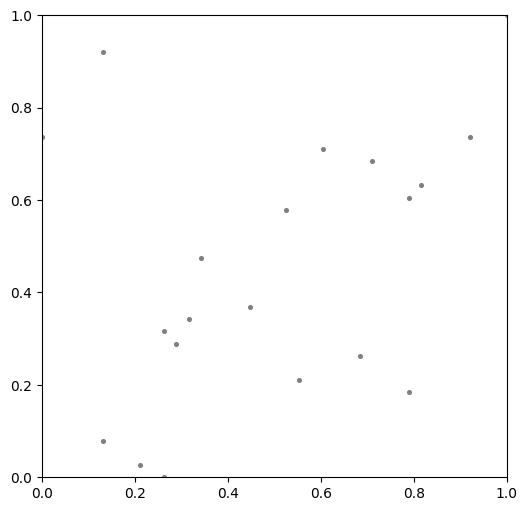

In [9]:
# 데이터의 수 20개, 학습 횟수: 2000-회
num_data = 20
num_epoch = 20000

x = (torch.FloatTensor([[160], [155], [162], [171], [176], [163], [180], [185], [155], [173], [160], [167], [177], [181], [150], [158], [161], [180], [170], [188]]))
y = (torch.FloatTensor([[42], [45], [55], [50], [52], [60], [65], [70], [77], [69], [54], [56], [68], [66], [70], [43], [53], [49], [64], [80]]))

# 최소값과 최대값을 찾는다
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()

# 정규화를 위해 최소값을 빼고 최대값으로 나눈다
tensor_x = (x - x_min) / (x_max - x_min)
tensor_y = (y - y_min) / (y_max - y_min)

# figure의 크기를 지정
plt.figure(figsize=(6,6))

plt.scatter(tensor_x.numpy(), tensor_y.numpy(), s=7, c="gray")

# figure의 x,y축 범위를 지정
plt.axis([0, 1, 0, 1])

# figure 출력
plt.show()

# 선형 모델 생성
model = nn.Linear(1,1)
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0012)

Epoch [500/20000], Loss: 0.1278570592403412
Epoch [1000/20000], Loss: 0.11533943563699722
Epoch [1500/20000], Loss: 0.10875451564788818
Epoch [2000/20000], Loss: 0.10331054031848907
Epoch [2500/20000], Loss: 0.09865205734968185
Epoch [3000/20000], Loss: 0.094657763838768
Epoch [3500/20000], Loss: 0.09123256057500839
Epoch [4000/20000], Loss: 0.08829537034034729
Epoch [4500/20000], Loss: 0.08577663451433182
Epoch [5000/20000], Loss: 0.08361675590276718
Epoch [5500/20000], Loss: 0.0817645937204361
Epoch [6000/20000], Loss: 0.08017630875110626
Epoch [6500/20000], Loss: 0.0788143128156662
Epoch [7000/20000], Loss: 0.07764636725187302
Epoch [7500/20000], Loss: 0.07664482295513153
Epoch [8000/20000], Loss: 0.07578596472740173
Epoch [8500/20000], Loss: 0.07504945993423462
Epoch [9000/20000], Loss: 0.07441790401935577
Epoch [9500/20000], Loss: 0.07387632876634598
Epoch [10000/20000], Loss: 0.07341189682483673
Epoch [10500/20000], Loss: 0.07301364094018936
Epoch [11000/20000], Loss: 0.072672136

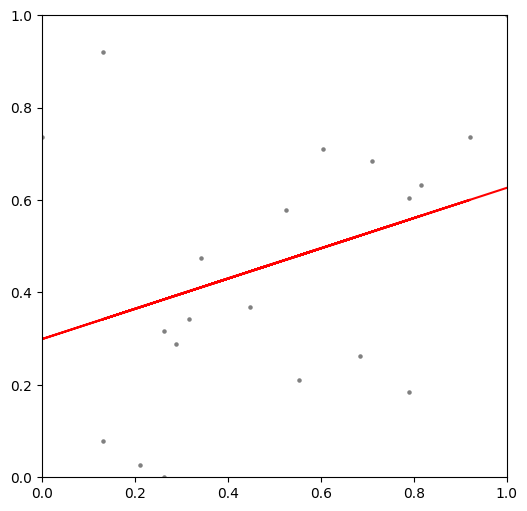

In [10]:
loss_arr = []

for epoch in range(num_epoch):
    # 경사 초기화
    optimizer.zero_grad()

    # 모델에 입력값 전달하여 결과 얻기
    output = model(tensor_x)

    # 손실 계산
    loss = loss_func(output, tensor_y)

    # 역전파 수행
    loss.backward()

    # 모델 파라미터 업데이트 -> 모델 성능 개선
    optimizer.step()

    # 손실 배열에 손실 값 추가
    loss_arr.append(loss.detach().numpy())

    # 500번째 학습마다 loss값 출력.
    if (epoch + 1) % 500 == 0:
        print(f"Epoch [{epoch + 1}/{num_epoch}], Loss: {loss.item()}")

# 학습 후 데이터와 모델 결과값 확인
plt.figure(figsize=(6, 6))
plt.scatter(tensor_x.numpy(), tensor_y.numpy(), s=5, c="gray")
plt.plot(tensor_x.detach().numpy(), output.detach().numpy(),c="red")
plt.axis([0,1,0,1])
plt.show()

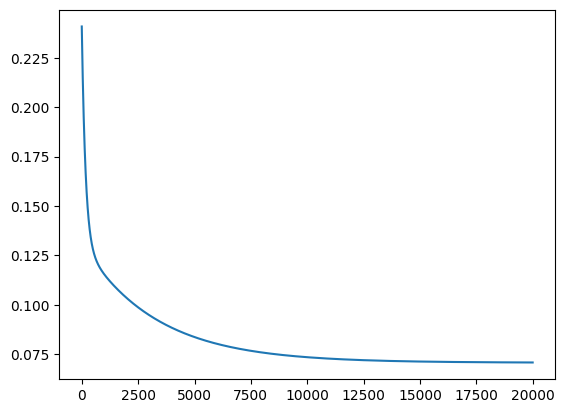

In [11]:
# 손실 그래프
# matplotlib의 plot 함수를 이용해 손실이 어떻게 줄어가는지 확인
plt.plot(loss_arr)
plt.show()

In [12]:
# 학습 후 모델 변수 값 확인
# 현재 모델은 weight 와 bias를 변수로 가지고 있는데 그 값들이 학습 후 실제 몇인지 수치적으로 확인해본다.
param_list = list(model.parameters())
print("Weight: ", param_list[0].item(), "\nBias: ", param_list[1].item())

Weight:  0.3275116980075836 
Bias:  0.2989194393157959
